In [1]:
from functions.IRL import *
from functions.planning import *
from functions.plotting import *
from functions.sampling import *

Construct the MDP\Rs $\mathcal{M}$ and $\mathcal{M}'$.

In [2]:
# expert's MDP M: S,A,s0,gamma,p
n = 10
A = 5
s0x, s0y = n//3+1, n//4+1
p = get_p(n)
gamma = 0.8

# new MDP M': S,A,s0',gamma',p'
s0x_prime, s0y_prime = s0x, s0y
gamma_prime = gamma
p_prime = get_p(n) # opposite_p(n)

# constraints C
n_C = (2*n)//3
rows = np.arange(n_C).astype(int)
cols = np.full(n_C, n//2)
C = (rows, cols)

Construct the deterministic expert's policy $\pi^E$ used by OPT, and estimate
its occupancy measure in $\mathcal{M}$.

In [3]:
# expert's policy
piE = -np.ones((n,n))
sgx, sgy = n//3, (n*2)//3
piE[[s0x for _ in range(sgy-s0y)], [i for i in range(s0y,sgy)]] = 0
piE[s0x,sgy] = 2
piE[sgx, sgy] = 4

# estimate the expert's occupancy
dE_s, dE_sa = compute_occupancy(piE,p,gamma,s0x,s0y)

Generalize the expert's behavior to the new environment and constraints using
various methods, and plot the results.

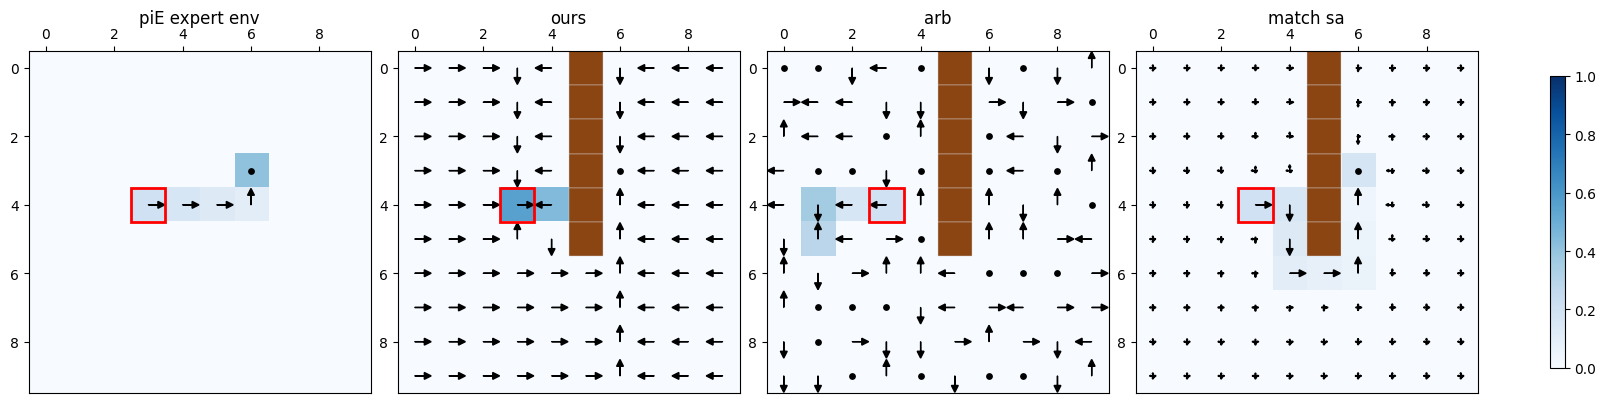

In [4]:
# compute policies for new env
policies = {}

# expert source env
policies['piE expert env'] = (piE, dE_s,s0x,s0y, None)

# ours
rOPT = IRL_OPT(piE,dE_s)
_, _, pi = V_iteration(gamma_prime,p_prime,rOPT,C)
d, _ = compute_occupancy(pi,p_prime,gamma_prime,s0x_prime,s0y_prime)
policies['ours'] = (pi, d, s0x_prime, s0y_prime, C)

# arbitrary reward
rarb, _ = best_case_OPT(piE,dE_s,gamma,p)
_, _, pi = V_iteration(gamma_prime,p_prime,rarb,C)
d, _ = compute_occupancy(pi,p_prime,gamma_prime,s0x_prime,s0y_prime)
policies['arb'] = (pi, d, s0x_prime, s0y_prime, C)

# matching policy sa
d_sa, d_s, pi = match_state_action_occupancy(gamma_prime,s0x_prime,s0y_prime,p_prime,dE_sa,C)
policies['match sa'] = (pi, d_s, s0x_prime, s0y_prime, C)

# plot policies
plot_multiple_policies(policies)

Construct the stochastic expert's policy $\pi^E$ used by both MCE and BIRL, and estimate
its occupancy measure in $\mathcal{M}$.

In [5]:
# expert's policy
r = np.zeros((n,n,5))
r[n//3, (n*2)//3] = 1
beta = 0.5
piE = boltzmann_policy(gamma,p,r,beta)
dE_s, dE_sa = compute_occupancy(piE,p,gamma,s0x,s0y)

# truncate
thr = 1e-4
piE, dE_s, dE_sa = get_piE_stoch(dE_sa, thr)

Generalize the expert's behavior to the new environment and constraints using
various methods, and plot the results.

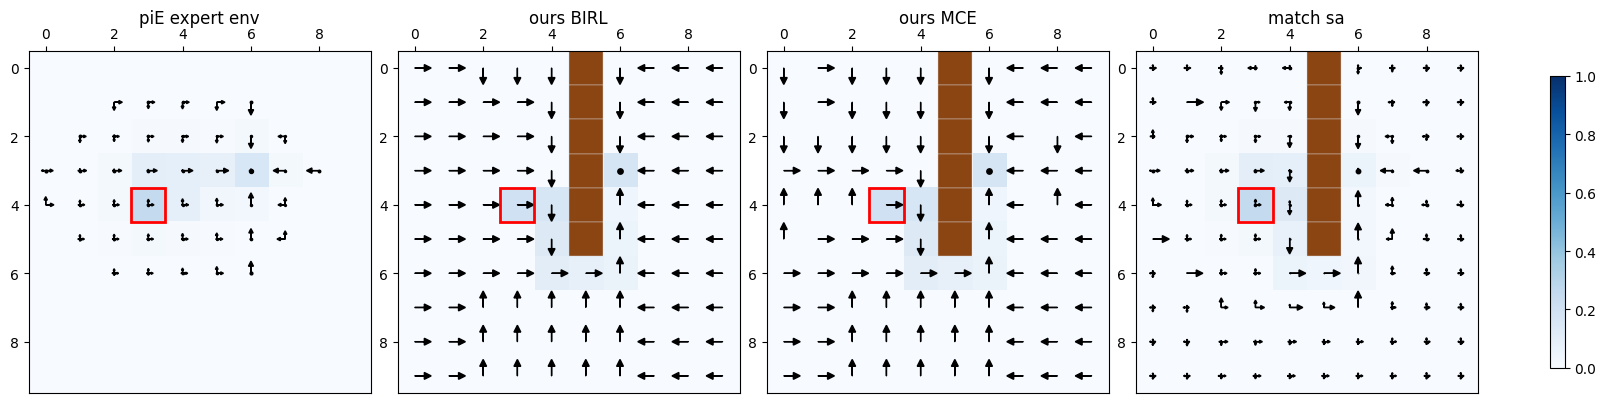

In [6]:
# compute policies for new env
policies = {}

# expert source env
policies['piE expert env'] = (piE, dE_s,s0x,s0y, None)

# ours
rBIRL = IRL_BIRL(piE,dE_s,1e-6)
_, _, pi = V_iteration(gamma_prime,p_prime,rBIRL,C)
d, _ = compute_occupancy(pi,p_prime,gamma_prime,s0x_prime,s0y_prime)
policies['ours BIRL'] = (pi, d, s0x_prime, s0y_prime, C)

# ours
rMCE = IRL_MCE(piE,dE_s,1e-6)
_, _, pi = V_iteration(gamma_prime,p_prime,rMCE,C)
d, _ = compute_occupancy(pi,p_prime,gamma_prime,s0x_prime,s0y_prime)
policies['ours MCE'] = (pi, d, s0x_prime, s0y_prime, C)

# matching policy sa
d_sa, d_s, pi = match_state_action_occupancy(gamma_prime,s0x_prime,s0y_prime,p_prime,dE_sa,C)
policies['match sa'] = (pi, d_s, s0x_prime, s0y_prime, C)

# plot policies
plot_multiple_policies(policies)